# Course 4 Assignment 2

In this assignment we have to grow some random forests

In [1]:
# import needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import sklearn.metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

## Loading and preparing data

In [2]:
# show all columns
pd.set_option('display.max_columns', None)
# loading the data from the local file
df = pd.read_csv('data/covid_data.csv')

In [3]:
# making the data more usable for a classifier, i will get the data for the last date and try and classify countries as high or low death rate
# prepare data
dfx = df.dropna(subset=['continent'])  # gets rid of summaries for 'world' and 'africa' etc, as I only want data for countries
dfx = dfx[dfx.date == '2021-04-28']
cols = ['location', 'total_cases_per_million', 'total_deaths_per_million', 'population', 'population_density', 'people_fully_vaccinated',
       'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'cardiovasc_death_rate', 'diabetes_prevalence', 
        'hospital_beds_per_thousand', 'life_expectancy', 'human_development_index']
dfx.people_fully_vaccinated = dfx.people_fully_vaccinated.fillna(0)  # if there is no data for vaccinations, I will assume it's 0
dfx = dfx[cols].dropna()
dfx['percentage_fully_vaccinated'] = (dfx.people_fully_vaccinated/dfx.population) * 100
# binning response variable
dfx['total_deaths_binned'] = pd.cut(dfx.total_deaths_per_million, 2, labels=['low', 'high'])
# dropping columns I have transformed so the data isn't there twice as that would affect predictions
dfx.drop(['people_fully_vaccinated', 'total_deaths_per_million'], axis=1, inplace=True)
dfx.tail(10)

,location,total_cases_per_million,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,hospital_beds_per_thousand,life_expectancy,human_development_index,percentage_fully_vaccinated,total_deaths_binned
80089,United Arab Emirates,52202.237,9890400.0,112.442,34.0,1.144,0.526,67293.483,317.840,17.26,1.20,77.97,0.890,0.000000,low
80544,United Kingdom,65218.009,67886004.0,272.898,40.8,18.517,12.527,39753.244,122.137,4.28,2.54,81.32,0.932,20.687565,high
81008,United States,97373.390,331002647.0,35.608,38.3,15.413,9.732,54225.446,151.089,10.79,2.77,78.86,0.926,29.620434,high
81421,Uruguay,55567.694,3473727.0,19.751,35.6,14.655,10.361,20551.409,160.708,6.93,2.80,77.91,0.817,17.007065,low
81832,Uzbekistan,2689.279,33469199.0,76.134,28.2,4.469,2.873,6253.104,724.417,7.57,4.00,71.72,0.720,0.000000,low
82835,Venezuela,6856.076,28435943.0,36.253,29.0,6.614,3.915,16745.022,204.850,6.47,0.80,72.06,0.711,0.000000,low
83298,Vietnam,29.433,97338583.0,308.127,32.6,7.150,4.718,6171.884,245.465,6.00,2.60,75.40,0.704,0.000000,low
84147,Yemen,209.985,29825968.0,53.508,20.3,2.922,1.583,1479.147,495.003,5.35,0.70,66.12,0.470,0.000000,low
84555,Zambia,4976.296,18383956.0,22.995,17.7,2.480,1.542,3689.251,234.499,3.94,2.00,63.89,0.584,0.000000,low
84961,Zimbabwe,2569.548,14862927.0,42.729,19.6,2.822,1.882,1899.775,307.846,1.82,1.70,61.49,0.571,0.470917,low


## Growing some forests

In [4]:
y = dfx.total_deaths_binned
X = dfx.drop(['total_deaths_binned', 'location'], axis=1)  # decision trees don't like strings, so no locations

In [5]:
# split the data in to test and train sets
# random state means I will get the same results each time I run this
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.4, random_state=0)

# fit the model
clf = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

# get predictions
y_hat = clf.predict(X_test)

sklearn.metrics.confusion_matrix(y_test, y_hat)

array([[11,  4],
       [ 8, 69]], dtype=int64)

In [6]:
sklearn.metrics.accuracy_score(y_test, y_hat)

0.8695652173913043

So it is 87% accurate with 10 trees

## Feature Importance

In [7]:
mod = ExtraTreesClassifier().fit(X_train, y_train)
lst = []
for i, j in zip(list(X.columns), list(mod.feature_importances_)):
    lst.append([i, j])
lst.sort(key=lambda x: x[1], reverse=True)
print('List of Features in descending order of importance:\n')
for thing in lst:
    print(thing)

List of Features in descending order of importance:

['total_cases_per_million', 0.18235756352313556]
['cardiovasc_death_rate', 0.10537062743272695]
['population', 0.07568074541233794]
['gdp_per_capita', 0.07369520530254932]
['aged_70_older', 0.07298244006330509]
['human_development_index', 0.07017004597090978]
['median_age', 0.06929804236416746]
['life_expectancy', 0.06862980377998726]
['percentage_fully_vaccinated', 0.06583283439090101]
['diabetes_prevalence', 0.06498495149845335]
['aged_65_older', 0.0594057999514822]
['hospital_beds_per_thousand', 0.05599195675733982]
['population_density', 0.035599983552704204]


## Trying forests with different numbers of trees

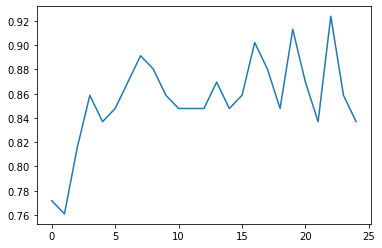

In [8]:
trees=range(25)
accuracy=np.zeros(25)

for idx in range(len(trees)):
   classifier=RandomForestClassifier(n_estimators=idx + 1)
   classifier=classifier.fit(X_train, y_train)
   predictions=classifier.predict(X_test)
   accuracy[idx]=sklearn.metrics.accuracy_score(y_test, predictions)
   
plt.cla()
_ = plt.plot(trees, accuracy)

To get the number of trees needed for maximum accuracy, I need the index of the maximum value in the accuracy array, + 1 because python starts indexing at 0 and my tree range started at 1.

In [9]:
best_no_trees = np.argmax(accuracy) + 1
best_no_trees

23

## Rerunning the Forest with new info

In [10]:
# fit the model
clf = RandomForestClassifier(n_estimators=23).fit(X_train, y_train)

# get predictions
y_hat = clf.predict(X_test)

sklearn.metrics.confusion_matrix(y_test, y_hat)

array([[ 5, 10],
       [ 4, 73]], dtype=int64)

In [11]:
sklearn.metrics.accuracy_score(y_test, y_hat)

0.8478260869565217

Ha, 85% is less accurate than with 10 trees!
I think the important point is that 1 tree alone cannot be as accurate as many trees for this data.

## Summary

As in most of my other earlier models, the number of covid-19 cases per million in a country is the most important predictor of the number of covid-19 related deaths in a country. I ran the model several times and while the order of feature importances changed, that was always the number one. The variable I have been interested in using, percentage of people fully vaccinated, was always in the lower half.

My model using 10 trees was 87% accurate. I ran it using 1 to 25 trees and the results suggested that 23 trees would be most accurate, so I tried that and it was less accurate than my 10 tree model! I also ran the 'number of trees' code several times, and the only consistent point was that 1 tree would not work for this dataset, multiple trees are required.